# Import libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
pip install scikit-learn


In [2]:
pip install mlxtend

                                              0.0/1.4 MB ? eta -:--:--
     ---                                      0.1/1.4 MB 3.3 MB/s eta 0:00:01
     --------------                           0.5/1.4 MB 5.1 MB/s eta 0:00:01
     ---------------------------------------  1.4/1.4 MB 10.7 MB/s eta 0:00:01
     ---------------------------------------- 1.4/1.4 MB 9.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# Load data

In [3]:
df = pd.read_csv("Social_Network_Ads.csv")

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


# Basic stats

In [5]:
df.shape

(400, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [7]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

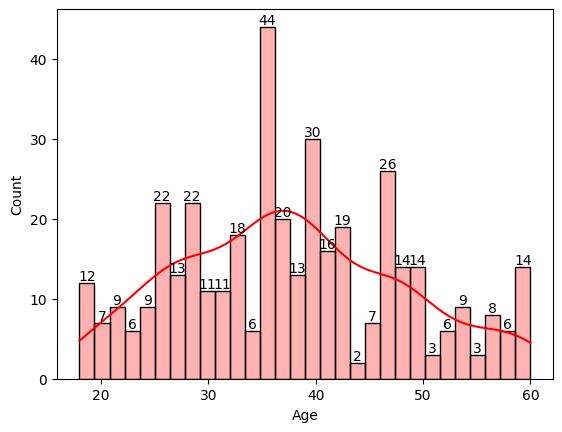

In [9]:
histplot = sns.histplot(df['Age'], kde=True, bins=30, color='red', alpha=0.3)
for i in histplot.containers:
    histplot.bar_label(i,)
plt.show()

#kde=True argument adds a kernel density estimate line to the plot
#alpha=0.3 sets the transparency of the bars to 0.3.

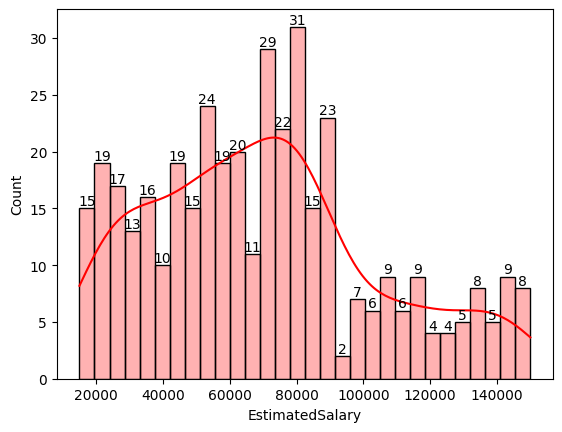

In [10]:
histplot = sns.histplot(df['EstimatedSalary'], kde=True, bins=30, color='red', alpha=0.3)
for i in histplot.containers:
    histplot.bar_label(i,)
plt.show()

#adds bar labels to the plot. The bar_label() function adds a text label on top of each bar. 
#The empty parentheses after histplot.bar_label(i,) indicate that no specific formatting or value is passed for the labels.

In [11]:
df["Gender"].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

In [12]:
def gender_encoder(value):
    if (value == "Male"):
        return 1
    elif (value == "Female"):
        return 0
    else:
        return -1

In [13]:
df["Gender"] = df["Gender"].apply(gender_encoder)

#gender_encoder function is to transform the values in the "Gender" column according to some defined logic.

In [14]:
df["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

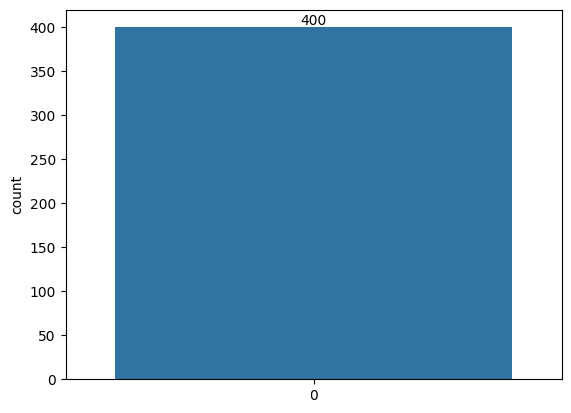

In [16]:
countplot = sns.countplot(df["Purchased"])
for i in countplot.containers:
    countplot.bar_label(i,)
plt.show()

#The countplot() function counts the occurrences of each unique value in the specified column and displays it as a bar chart.


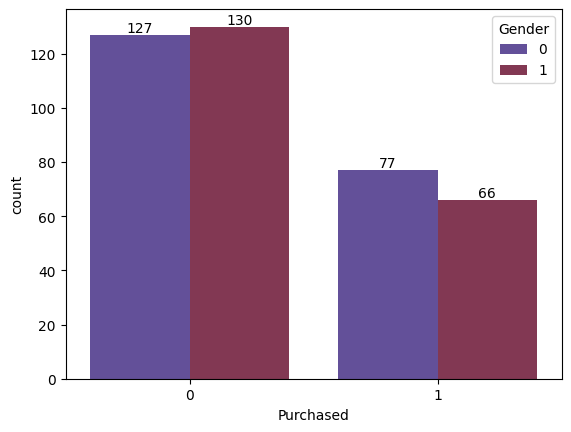

In [18]:
countplot = sns.countplot(x="Purchased", hue="Gender", data=df, palette="twilight")

for i in countplot.containers:
    countplot.bar_label(i,)
plt.show()

#The hue parameter is set to the "Gender" column, which adds a different color to each bar based on the gender category. 
#The palette parameter is set to "twilight" to specify the color palette to be used in the plot.

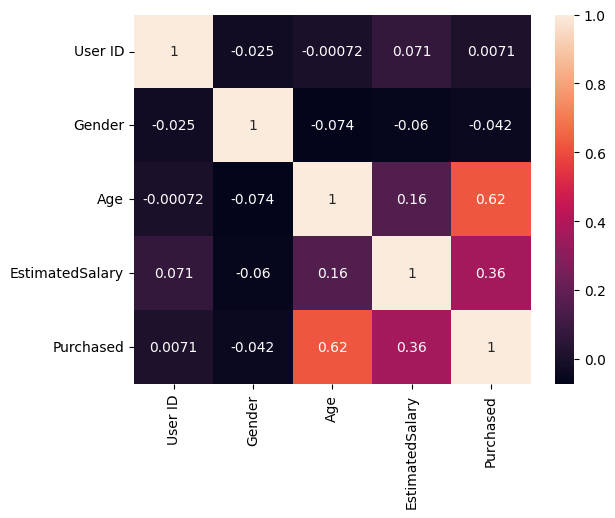

In [19]:
sns.heatmap(df.corr(), annot=True)
plt.show()
#corr() method calculates the pairwise correlation between all columns in the DataFrame
#annot=True argument adds numeric annotations to the heatmap, displaying the correlation values on each cell.

# Data preparation

In [20]:
x = df[["Age", "EstimatedSalary"]]
y = df["Purchased"]

In [21]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((320, 2), (80, 2), (320,), (80,))

# Model building

In [24]:
#The n_jobs parameter is set to -1, which indicates that the maximum number of parallel jobs should be used for computations. 
#This can speed up the training process if your machine supports parallel processing.
model = LogisticRegression(n_jobs=-1)

#After executing this code, the model object will contain the Logistic Regression model, 
#which can be used to train the model on a given dataset and make predictions.

In [40]:
model.fit(x_train, y_train)
#This line fits the Logistic Regression model to the training data. 

LogisticRegression(n_jobs=-1)

In [28]:
y_pred = model.predict(x_test)

# Evalutation

In [32]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
#takes the actual values (y_test) and the predicted values (y_pred) as input and returns a matrix that 
#represents the counts of true positive, true negative, false positive, and false negative predictions.

[[50  2]
 [ 9 19]]


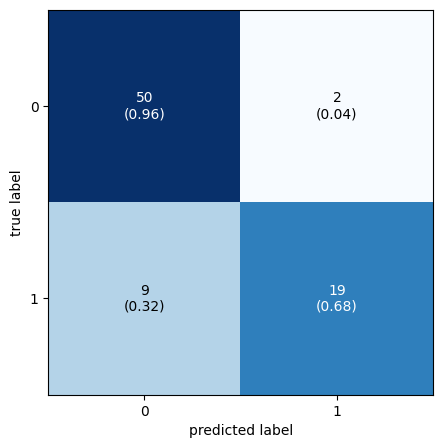

In [41]:
plot_confusion_matrix(conf_mat=cm, figsize=(5,5), show_normed=True)
plt.show()

In [34]:
print(f"TN value is {cm[0][0]}")
print(f"FP value is {cm[0][1]}")
print(f"FN value is {cm[1][0]}")
print(f"TP value is {cm[1][1]}")

TN value is 50
FP value is 2
FN value is 9
TP value is 19


In [35]:
print(f"Accuracy score is {accuracy_score(y_test, y_pred)}")

Accuracy score is 0.8625


In [36]:
print(f"Error rate is {1-accuracy_score(y_test, y_pred)}")

Error rate is 0.13749999999999996


In [37]:
print(f"Precision score is {precision_score(y_test, y_pred)}")

Precision score is 0.9047619047619048


In [38]:
print(f"Recall score is {recall_score(y_test, y_pred)}")

Recall score is 0.6785714285714286


In [39]:
print(classification_report(y_test, y_pred))

#function takes the actual values (y_test) and the predicted values (y_pred) as input and 
#returns a string that displays metrics such as precision, recall, F1-score, and support for each class.

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80

